# Pie chart of samples

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("../../input/phenotypes/merged/_m/merged_phenotypes.csv", index_col=0)
df = df[df["Race"].isin(["AA", "CAUC"]) & (df["Dx"].isin(["Control", "Schizo"]))].copy()
df.Race = df.Race.astype("category").cat.rename_categories({'CAUC': 'EA'})
df.head()

,BrNum,RNum,Region,RIN,Age,Sex,Race,Dx,mitoRate,rRNA_rate,overallMapRate
R12864,Br1303,R12864,Caudate,9.6,42.98,F,AA,Schizo,0.032654,0.000087,0.909350
R12865,Br1320,R12865,Caudate,9.5,53.12,M,AA,Schizo,0.019787,0.000070,0.873484
R12866,Br1321,R12866,Caudate,9.1,57.13,F,AA,Schizo,0.013006,0.000040,0.905505
R12867,Br1326,R12867,Caudate,9.2,74.56,M,AA,Schizo,0.032594,0.000038,0.910551
R12868,Br1418,R12868,Caudate,9.5,43.35,M,AA,Schizo,0.052347,0.000056,0.748659


In [4]:
df.groupby("Region").size()

Region
Caudate         420
DLPFC           434
DentateGyrus    161
HIPPO           447
dtype: int64

In [5]:
data = df.groupby(["Region", "Race"]).size().reset_index().rename(columns={0:"N"})
data

,Region,Race,N
0,Caudate,AA,217
1,Caudate,EA,203
2,DLPFC,AA,241
3,DLPFC,EA,193
4,DentateGyrus,AA,78
5,DentateGyrus,EA,83
6,HIPPO,AA,248
7,HIPPO,EA,199


In [6]:
caudate = data[(data["Region"] == "Caudate")].drop("Region", axis=1).set_index("Race")
dlpfc = data[(data["Region"] == "DLPFC")].drop("Region", axis=1).set_index("Race")
gyrus = data[(data["Region"] == "DentateGyrus")].drop("Region", axis=1).set_index("Race")
hippocampus = data[(data["Region"] == "HIPPO")].drop("Region", axis=1).set_index("Race")

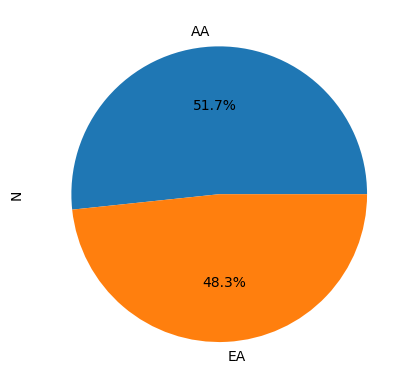

In [7]:
caudate.N.plot.pie(autopct="%.1f%%")
plt.savefig('caudate_pie.pdf')

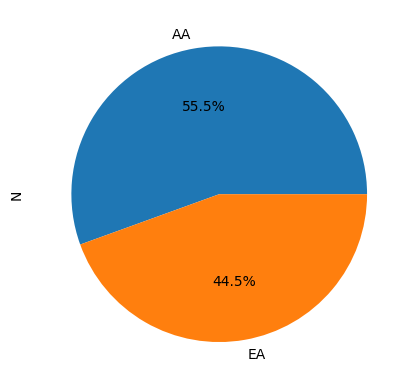

In [8]:
dlpfc.N.plot.pie(autopct="%.1f%%");
plt.savefig('dlpfc_pie.pdf')

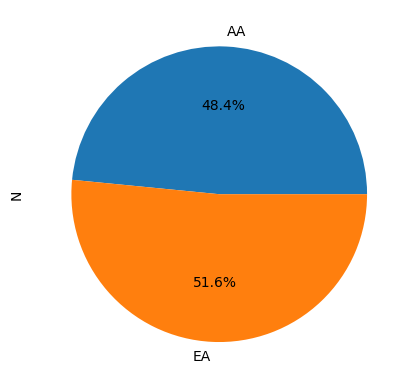

In [9]:
gyrus.N.plot.pie(autopct="%.1f%%");
plt.savefig('dentate_gyrus_pie.pdf')

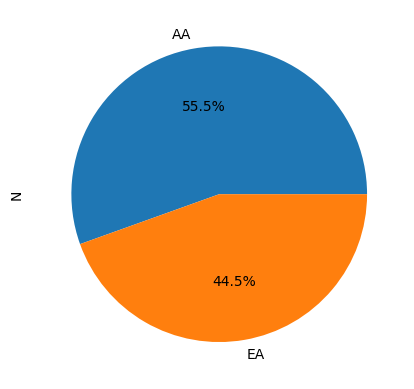

In [10]:
hippocampus.N.plot.pie(autopct="%.1f%%")
plt.savefig('hippocampus_pie.pdf')